# 2. Disease prediciton

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn import ensemble

In [57]:
cardio = pd.read_csv(
    r"C:\Users\kalls\Documents\GitHub\Maskininl-rning-Lukas-K-llstr-m\data_cardio\cardio_train.csv", sep=";")


# 2.0 Eda uppvärmning

In [58]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [59]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Pie Chart of the number of patients with and without disease

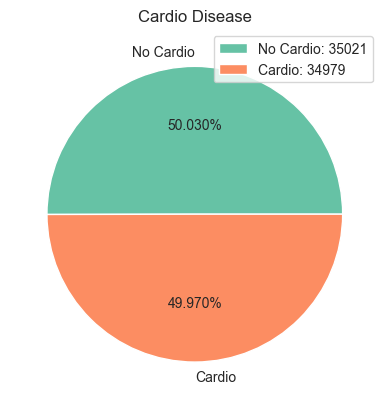

In [60]:
color = sns.color_palette("Set2")
sns.set_palette(color)
sns.set_style("whitegrid")
plt.pie(cardio.cardio.value_counts(), labels=[
        "No Cardio", "Cardio"], autopct="%3.3f%%")
plt.legend(["No Cardio: "+str(cardio.cardio.value_counts()[0]), "Cardio: "+str(cardio.cardio.value_counts()
           [1]), "Total: "+str(cardio.cardio.value_counts()[0]+cardio.cardio.value_counts()[1])])
plt.title("Cardio Disease")
plt.show()


# Pie chart of the number of patients with normal, above normal or well above normal cholesterol levels

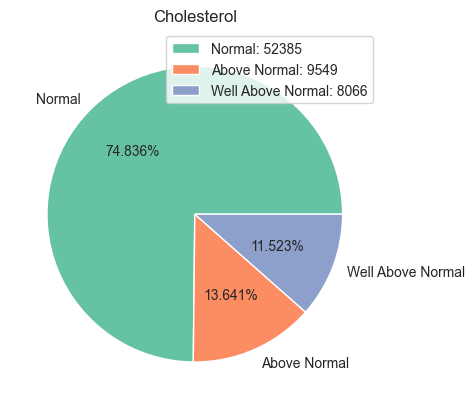

In [61]:
plt.pie(cardio.cholesterol.value_counts(), labels=[
        "Normal", "Above Normal", "Well Above Normal"], autopct="%3.3f%%")
plt.legend(["Normal: "+str(cardio.cholesterol.value_counts()[1]),
            "Above Normal: "+str(cardio.cholesterol.value_counts()[2]),
            "Well Above Normal: "+str(cardio.cholesterol.value_counts()[3]),
            "Total: "+str(cardio.cholesterol.value_counts()[1]+cardio.cholesterol.value_counts()[2]+cardio.cholesterol.value_counts()[3])])
plt.title("Cholesterol")
plt.show()

## Bar plot over the age distribution of the patients

In [62]:
cardio["age_years"] = cardio["age"]/365

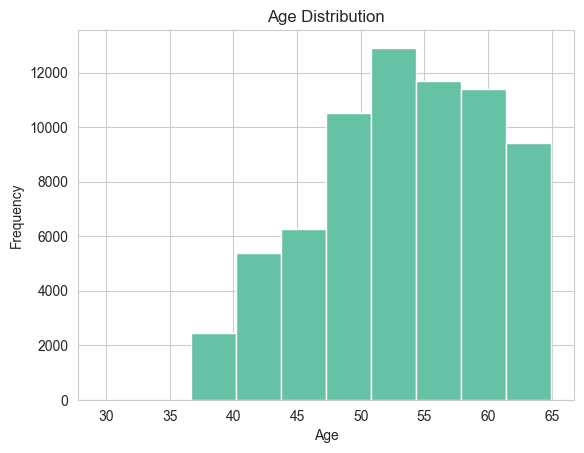

In [63]:
# plot the age distribution using a histogram
plt.hist(cardio.age_years, bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Pie chart over the number of smokers and non-smokers

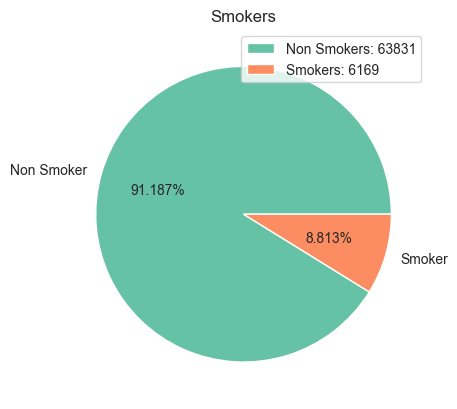

In [64]:
plt.pie(cardio.smoke.value_counts(), labels=[
        "Non Smoker", "Smoker"], autopct="%3.3f%%")
plt.legend(["Non Smokers: "+str(cardio.smoke.value_counts()[0]),
            "Smokers: "+str(cardio.smoke.value_counts()[1]),
            "Total: "+str(cardio.smoke.value_counts()[0]+cardio.smoke.value_counts()[1])])
plt.title("Smokers")
plt.show()


## Plots of the heights and weights of the patients

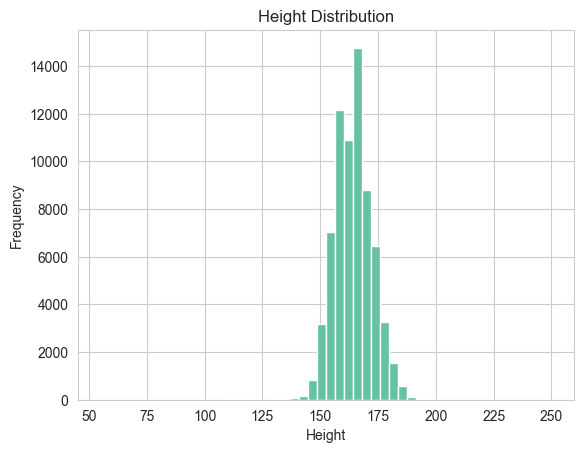

In [65]:
plt.hist(cardio.height, bins=50)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

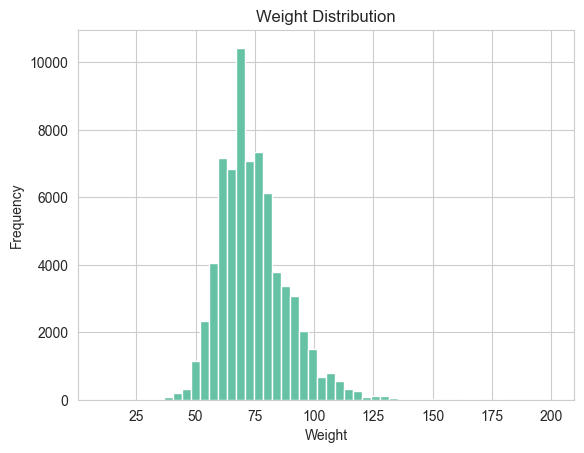

In [66]:
plt.hist(cardio.weight, bins=50)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

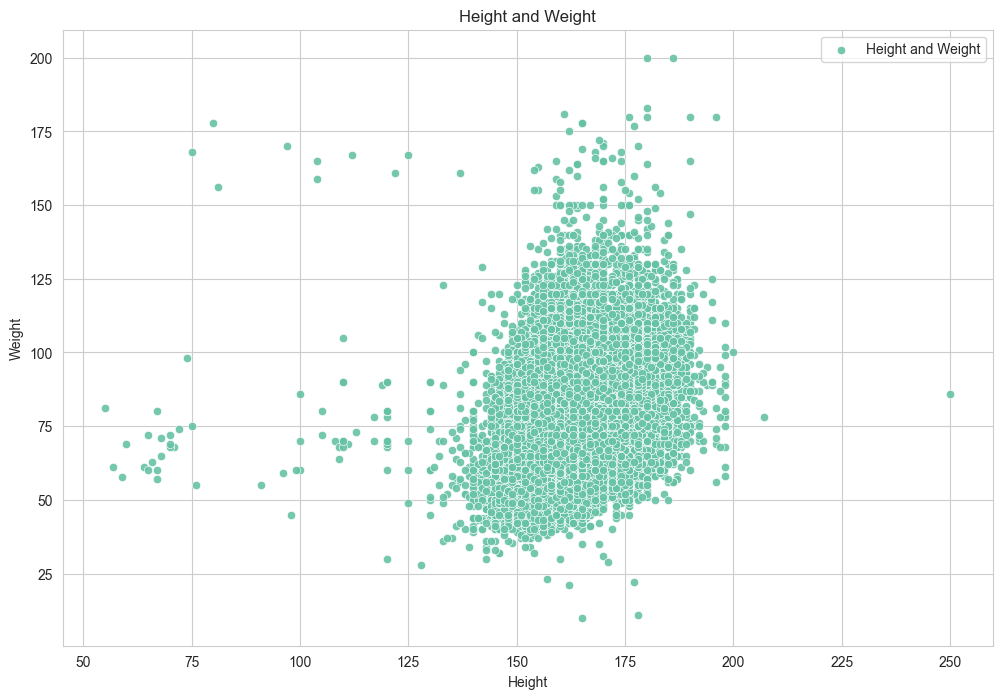

In [67]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cardio.height, y=cardio.weight, alpha=0.9)
plt.title("Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Height and Weight"])

## Bar plot of the number of males and females with and without disease

In [68]:
cardio_yes = cardio[cardio.cardio == 1]
cardio_no = cardio[cardio.cardio == 0]
females = [cardio_no["gender"].value_counts(
)[1], cardio_yes["gender"].value_counts()[1]]
males = [cardio_no["gender"].value_counts(
)[2], cardio_yes["gender"].value_counts()[2]]

In [69]:
print(f"Female not sick/ sick: {females}")
print(f"Males not sick/ sick: {males}")

Female not sick/ sick: [22914, 22616]
Males not sick/ sick: [12107, 12363]


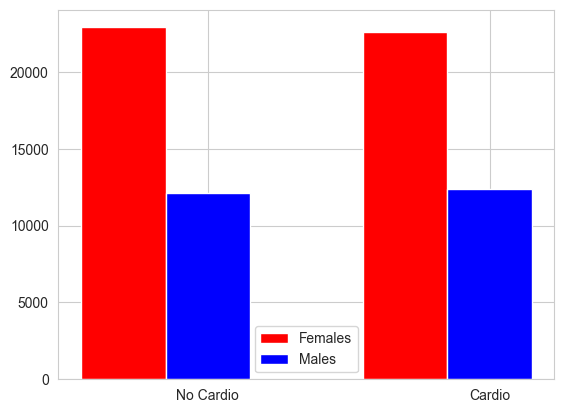

In [70]:
n = 2
r = np.arange(n)
width = 0.3
plt.bar(r, females, color="red", width=width)
plt.bar(r + width, males, color="blue", width=width)
plt.legend(["Females", "Males"])
plt.xticks([r + width for r in range(n)], ["No Cardio", "Cardio"])
plt.show()

## Plot of the bmi distribution of the patients

In [71]:
cardio["bmi"] = cardio["weight"]/((cardio["height"]/100)**2)

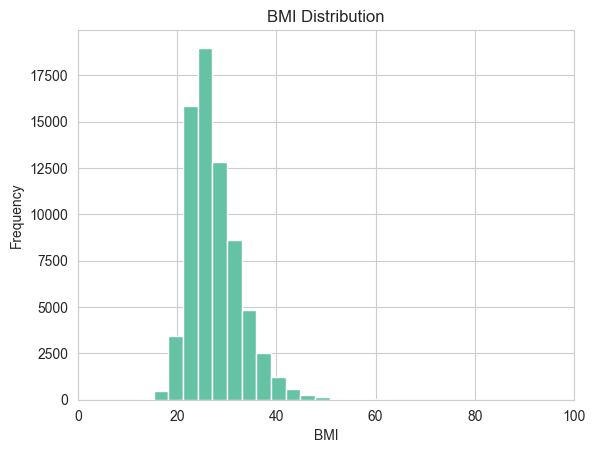

In [72]:
plt.hist(cardio.bmi, bins=100)
plt.xlim(0, 100)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


## Plot of the bmi classes of the patients

In [73]:
cardio["bmi_class"] = np.where(cardio.bmi < 18.5, "Underweight", np.where(cardio.bmi < 24.9, "Normal", np.where(
    cardio.bmi < 29.9, "Overweight", np.where(cardio.bmi < 34.9, "Obese Class 1", np.where(cardio.bmi < 39.9, "Obese Class 2", "Obese Class 3")))))

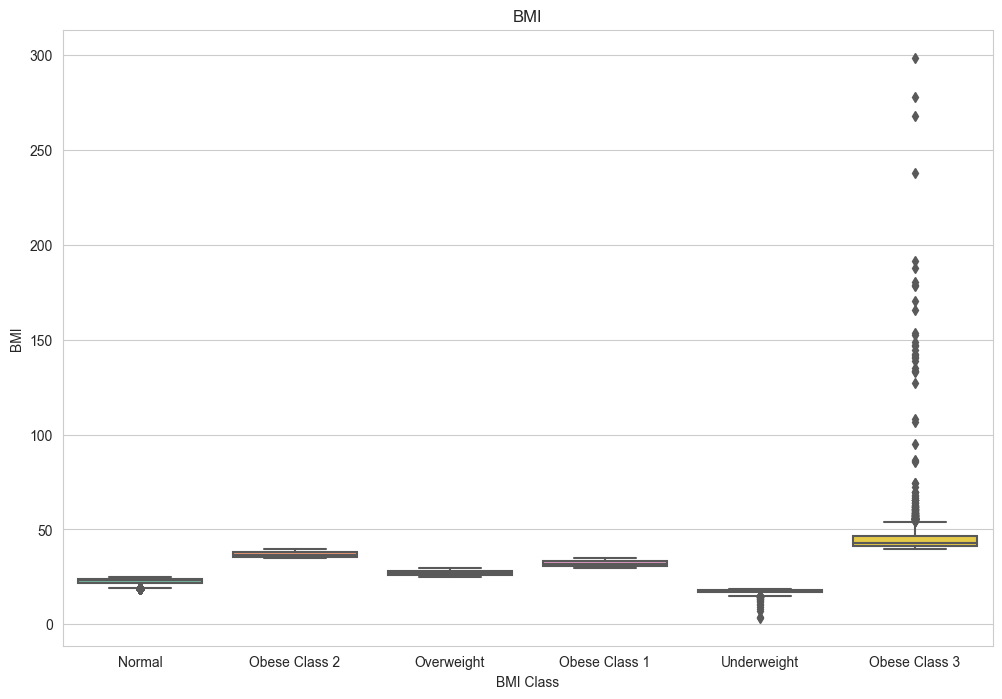

In [74]:
plt.figure(figsize=(12, 8))
ax1 = sns.boxplot(x=cardio.bmi_class, y=cardio.bmi)
plt.title("BMI")
plt.xlabel("BMI Class")
plt.ylabel("BMI")
plt.show()

In [75]:
cardio["bmi_class"].value_counts()

Overweight       25919
Normal           24748
Obese Class 1    12285
Obese Class 2     4486
Obese Class 3     1912
Underweight        650
Name: bmi_class, dtype: int64

#### Enligt boxplotten av bmierna för patienterna i datan är majoriteten av patienterna inom gränserna 18 - ~ 50. Det är enligt mig endast ett fåtal patienter med ett bmi över 60 eller under 10 som också enligt mig är rimliga värden för vad en människa kan väga. För att en man på 185cm ska ha ett bmi på över 60 behöver han väga 206 kg. För att en kvinna på 160cm ska ha ett bmi på under 10 behöver hon väga 26 kg.

### Remove unresonable outliers in the bmi column

In [76]:
cardio = cardio[cardio.bmi > 10]
cardio = cardio[cardio.bmi < 60]
print(f"Number of BMI values under 10: {cardio[cardio.bmi<10].shape[0]}")
print(f"Number of BMI values over 60: {cardio[cardio.bmi>60].shape[0]}")

Number of BMI values under 10: 0
Number of BMI values over 60: 0


### Create blood pressure classes

In [77]:
cardio["blood_pressure_class"] = np.where((cardio.ap_hi < 120) & (cardio.ap_lo < 80),"Healthy",
                                           np.where((cardio.ap_hi.between(120, 129)) & (cardio.ap_lo < 80),"Elevated",
                                                     np.where((cardio.ap_hi.between(130, 139)) | (cardio.ap_lo.between(80, 89)), "Stage 1 Hypertension", 
                                                              np.where((cardio.ap_hi.between(140, 180)) | (cardio.ap_lo.between(90, 120)),"Stage 2 Hypertension", "Hypertensive Crisis"))))
cardio["blood_pressure_class"].value_counts()


Stage 1 Hypertension    39900
Stage 2 Hypertension    17114
Healthy                  9600
Elevated                 3121
Hypertensive Crisis       192
Name: blood_pressure_class, dtype: int64

#### According to this foundation for medical education and research, is a systolic blood preassure over 180 or a diastolic blood preassure higher than 120 be very dangerrous and could lead to damage in several of your organs. However, it's not impossible for a reading at the doctors office for someone is diagnosed with hypertensive crisis to have a similair blood preassure. It is however my opinion that a higher blood preassure than this would lead to a need for urgent care, resulting in the ongoing blood preassure reading to be stopped. It's resonable to assume that the blood preassure readings in the data that are this high either are because of an incorrect reading, or a missinput when inputing data. I will therefore remove all patients with ap_hi/ap_lo over slighty above 180/120, in my case 200/140
#### In the same sense is 90/60 considered a low blood preassure so i will be removing all patients with blood pressure lower than 80ap_hi or 50ap_lo
### https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/hypertensive-crisis/faq-20058491
### https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465

In [78]:
nmbr_patients = cardio[(cardio.ap_hi > 200) | (cardio.ap_lo > 140)].value_counts().sum()
print(f"Number of patients with api over 200 or ap_lo over 140: {cardio[(cardio.ap_hi > 200) | (cardio.ap_lo > 140)].value_counts().sum()}")
print(f"Percentage of patients with api over 200 or ap_lo over 140: {round(nmbr_patients/cardio.shape[0]*100, 2)}%")


Number of patients with api over 200 or ap_lo over 140: 1069
Percentage of patients with api over 200 or ap_lo over 140: 1.53%


### Remove unresonable outliers in the blood pressure columns

In [79]:
cardio = cardio[~((cardio.ap_hi > 200) | (cardio.ap_lo > 140))]
cardio = cardio[~((cardio.ap_hi < 80) | (cardio.ap_lo < 50))]

## 2.2.0 Visualisering andel sjuka

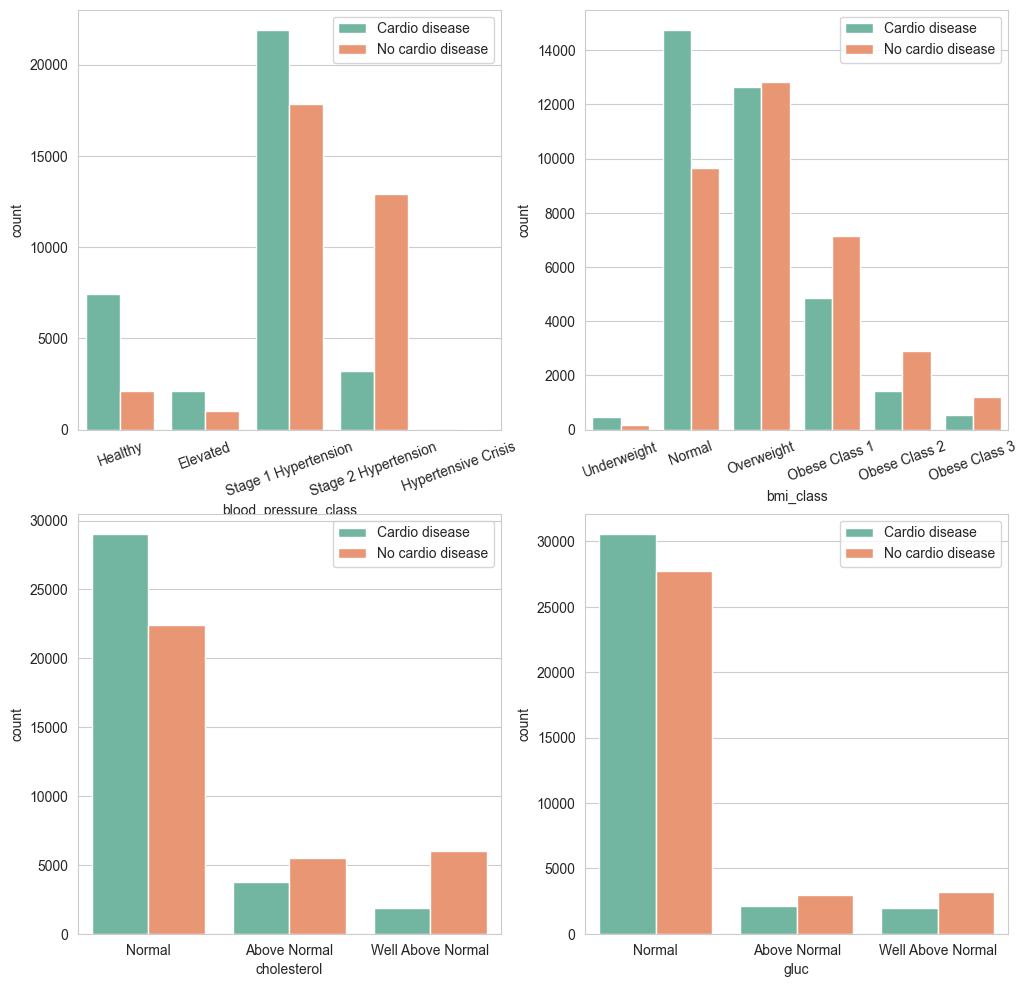

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

classes = ["Healthy", "Elevated", "Stage 1 Hypertension", "Stage 2 Hypertension", "Hypertensive Crisis"]
sns.countplot(x="blood_pressure_class", hue="cardio", data=cardio, ax=axes[0, 0], palette="Set2", order=classes)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=20)
axes[0, 0].legend(["Cardio disease", "No cardio disease"])

classes = ["Underweight", "Normal", "Overweight", "Obese Class 1", "Obese Class 2", "Obese Class 3"]
sns.countplot(x="bmi_class", hue="cardio", data=cardio, ax=axes[0, 1], palette="Set2", order=classes)
axes[0, 1].legend(["Cardio disease", "No cardio disease"])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=20)

sns.countplot(x="cholesterol", hue="cardio", data=cardio, ax=axes[1, 0], palette="Set2")
axes[1, 0].legend(["Cardio disease", "No cardio disease"])
axes[1,0].set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])

sns.countplot(x="gluc", hue="cardio", data=cardio, ax=axes[1, 1], palette="Set2")
axes[1, 1].legend(["Cardio disease", "No cardio disease"])
axes[1,1].set_xticklabels(["Normal", "Above Normal", "Well Above Normal"])

plt.show()

### 2.2.1 Visualisering korrelation

C:\Users\kalls\AppData\Local\Temp\ipykernel_10896\2907305997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardio.corr(), annot=True, cmap="RdYlGn")


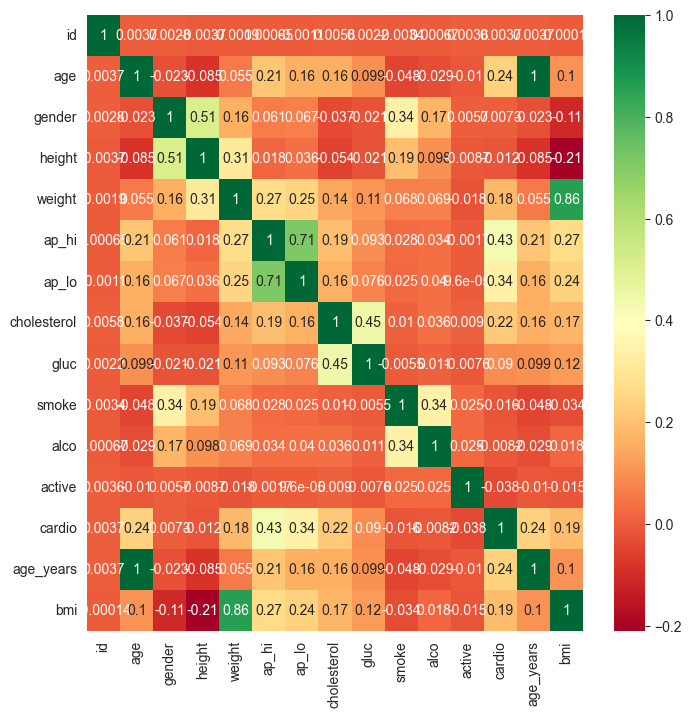

In [81]:
plt.figure(figsize=(8, 8))
sns.heatmap(cardio.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### The strongest correlations (that is not the same feature) are between (In descending order):
- Weight to bmi
###### Reason: since you use the weight directly to calculate the bmi the correlation is self explanatory
- height to gender
###### Reason: this correlation is also very easy to explain. When you look at the males in the dataset, the avarage length is higher than for the females.
- ap_hi to ap_lo
###### Reason: Seeing as both ap_hi and ap_lo are meassures of your blood preassure, it's not surprising that they are correlated. 
- ap_hi to cardio
###### Reason: High systolic blood pressure places increased stress on the blood vessels and heart, causing damage to the arteries and blood vessels over time, increasing the risk of heart disease, heart attacks, and strokes.

### 2.3 Skapa 2 dataset
##### Dataset 1

In [82]:
cardio_copy1 = cardio.copy()

cardio_copy1.drop(["ap_hi", "ap_lo", "weight", "height", "bmi"], axis=1, inplace=True) # creating a copy of the dataframe, dropping the listed columns and doing one-hot encoding to convert categorical variables to numerical

cardio_copy1 = pd.get_dummies(cardio_copy1, columns=["bmi_class", "blood_pressure_class", "gender"])
X1, y1 = cardio_copy1.drop("cardio", axis=1), cardio_copy1.cardio

##### Dataset 2

In [83]:
cardio_copy2 = cardio.copy()

cardio_copy2.drop(["bmi_class", "blood_pressure_class", "height", "weight"], axis=1, inplace=True)

cardio_copy2 = pd.get_dummies(cardio_copy2, columns=["gender"])
X2, y2 = cardio_copy2.drop("cardio", axis=1), cardio_copy2.cardio

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Split the datasets into train|test|val

In [85]:
#Dataset 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

# Dataset 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

## Standardize and normalize datasets

In [87]:
# standardize the first data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_val1 = scaler.transform(X_val1)
X_test1 = scaler.transform(X_test1)

# normalize the first data 
normalizer = Normalizer()
X_train1 = normalizer.fit_transform(X_train1)
X_val1 = normalizer.transform(X_val1)
X_test1 = normalizer.transform(X_test1)


In [88]:
# standardize the second data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_val2 = scaler.transform(X_val2)
X_test2 = scaler.transform(X_test2)

# normalize the second data
normalizer = Normalizer()
X_train2 = normalizer.fit_transform(X_train2)
X_val2 = normalizer.transform(X_val2)
X_test2 = normalizer.transform(X_test2)


## Defining param_grids for the models

In [89]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [90]:
param_grid_random_forest = {"n_estimators": [100, 200, 300], "max_depth": [5, 10, 15, 20], "min_samples_split": [2, 3, 4]}
param_grid_knn = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
param_grid_neural = {"hidden_layer_sizes": [(100, 100, 100), (100, 100), (100,)], "activation": ["relu", "tanh", "logistic"], "solver": ["sgd", "adam"], "alpha": [0.0001, 0.05], "learning_rate": ["constant", "adaptive"]}


neural_clf = GridSearchCV(MLPClassifier(), param_grid_neural, cv=5, verbose=3, scoring="recall", n_jobs=-1)
neural_clf2 = GridSearchCV(MLPClassifier(), param_grid_neural, cv=5, verbose=3, scoring="recall", n_jobs=-1)

knn_clf = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=3, scoring="recall", n_jobs=-1)
knn_clf2 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=3, scoring="recall", n_jobs=-1)
random_forest_clf = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5, verbose=3, scoring="recall", n_jobs=-1)
random_forest_clf2 = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5, verbose=3, scoring="recall", n_jobs=-1)

### Reason for methods and parameters:
#### Neural network: Neural network could be a good choice for this problem since the hidden layers allows learning of complex patterns in the data. Too many hidden layers can however lead to overfitting, so it's important to be careful when looking att the evaluation metrics. I chose 3 of the most commong activation parameters. I also chose sgd and adam as solver parameters, sgd since it's a simple and effective approach to fit linear classifiers, and adam since it closely ressembles sgd but it adapts the learning rate. I also chose 2 very different alpha parameters, 0.0001 would be helpful in a simpler problem, being a weaker regulizer, and 0.05 being more appropriate for a more complex problem, since it woujld regularize stronger. I then tested both constant and adaptive learning rate since they compliment eachother well.
#### Random forest: I chose random forest as an estimator since it's a good alghorithm when ur working with a lot of features. I choose 3 pretty large n_estimators since it's a good way to increase performance at the cost of computational cost since we have pretty many features. I kept the max_depth between 5 and 20 since a too high depth can lead to overfitting, but you still want it pretty deep to keep the complexity of the model. I randomly chose the min_samples_split but increasing those are good way of improving generalization of the alghorithm
#### Knn: Lastly i chose knn as an estimator as it's pretty different from the other models. Knn usually is a good choice when working with low-dimensional data, which we don't do now. I chose it to increase variance between the models. N_neighbors sets the number of neighbors for the model to consider. Too many neighbors leads to smoother decision boundaries but possible overfitting, less neighbors decrease smoothness of the boundaries but increases possibility for underfitting, so i choose a wide range of values. Weight controls the weight given to the neighbors, uniform being equal weight, and distance giving closer neighbors more weight. I choose euclidean and manhattan as metrics for no special reason since they are common ones. Alghorithm sets the alghorithm used to compute the nearest neighbors, ball_tree and kd_tree build tree strucures to speed up the search, brute brute-forces a search over all samples and auto chooses the best alghorithm based on the values passed to fit method.

## Prediction on validation set 1

In [91]:
# Fit the first dataset
neural_clf.fit(X_val1, y_val1)
knn_clf.fit(X_val1, y_val1)
random_forest_clf.fit(X_val1, y_val1)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=3)

In [92]:
# predict the first dataset
neural_clf.predict(X_val1)
knn_clf.predict(X_val1)
random_forest_clf.predict(X_val1)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Prediction on validation set 2

In [93]:
# Fit the second dataset
neural_clf2.fit(X_val2, y_val2)
knn_clf2.fit(X_val2, y_val2)
random_forest_clf2.fit(X_val2, y_val2)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=3)

In [94]:
# predict the second dataset
neural_clf2.predict(X_val2)
knn_clf2.predict(X_val2)
random_forest_clf2.predict(X_val2)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [95]:
print("The best parameters for the first data are: ")
print("Neural Network: ", neural_clf.best_params_)
print("KNN: ", knn_clf.best_params_)
print("Random Forest: ", random_forest_clf.best_params_)

The best parameters for the first data are: 
Neural Network:  {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'adam'}
KNN:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Random Forest:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


### Best parameters for dataset 1
- Linear SVC:  {'C': 0.1, 'loss': 'squared_hinge'}
- KNN:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
- Random Forest:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

In [96]:
print("The best parameters for the second data are: ")
print("Neural Network: ", neural_clf2.best_params_)
print("KNN: ", knn_clf2.best_params_)
print("Random Forest: ", random_forest_clf2.best_params_)

The best parameters for the second data are: 
Neural Network:  {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'adam'}
KNN:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Random Forest:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


### Best parameters for dataset 2
- Linear SVC:  {'C': 100, 'loss': 'squared_hinge'}
- KNN:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
- Random Forest:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

## Do predicion on the validation data for the first dataset

In [97]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [98]:
# Prediction on the validation data for set 1
y_pred_neural1 = neural_clf.predict(X_val1)
y_pred_knn1 = knn_clf.predict(X_val1)
y_pred_rforest1 = random_forest_clf.predict(X_val1)

cm_neural1 = confusion_matrix(y_val1, y_pred_neural1)
cm_knn1 = confusion_matrix(y_val1, y_pred_knn1)
cm_rforest1 = confusion_matrix(y_val1, y_pred_rforest1)

In [99]:
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return {"precision": precision, "recall": recall, "f1": f1}

neural_metrics1 = calculate_metrics(cm_neural1)
knn_metrics1 = calculate_metrics(cm_knn1)
rforest_metrics1 = calculate_metrics(cm_rforest1)
list_metrics1 = [neural_metrics1, knn_metrics1, rforest_metrics1] # calculating and saving the evaluation metrics for the first dataset

## Do predicion on the validation data for the second dataset

In [100]:
# Prediction on the validation data for set 2
y_pred_neural2 = neural_clf2.predict(X_val2)
y_pred_knn2 = knn_clf2.predict(X_val2)
y_pred_rforest2 = random_forest_clf2.predict(X_val2)

cm_neural2 = confusion_matrix(y_val2, y_pred_neural2)
cm_knn2 = confusion_matrix(y_val2, y_pred_knn2)
cm_rforest2 = confusion_matrix(y_val2, y_pred_rforest2)

In [101]:
neural_metrics2 = calculate_metrics(cm_neural2)
knn_metrics2 = calculate_metrics(cm_knn2)
rforest_metrics2 = calculate_metrics(cm_rforest2) 
list_metrics2 = [neural_metrics2, knn_metrics2, rforest_metrics2] # Calculating and saving the evaluation metrics for set 2

## Evaluation score

In [102]:
list_estimators = ["Neural", "KNN", "Random Forest"]
for i, metrics in enumerate(list_metrics1):
    print("The metrics for the first data for classifier ", list_estimators[i], " are: ")
    print(metrics)

print("\n")

for i, metrics in enumerate(list_metrics2):
    print("The metrics for the second data for classifier ", list_estimators[i], " are: ")
    print(metrics)

The metrics for the first data for classifier  Neural  are: 
{'precision': 0.7398792216506375, 'recall': 0.6113472555904639, 'f1': 0.6695001011940903}
The metrics for the first data for classifier  KNN  are: 
{'precision': 0.7366519470092332, 'recall': 0.6782480133062281, 'f1': 0.7062445877032618}
The metrics for the first data for classifier  Random Forest  are: 
{'precision': 0.7972945689481122, 'recall': 0.7298096470153391, 'f1': 0.7620609803164801}


The metrics for the second data for classifier  Neural  are: 
{'precision': 0.741047448522829, 'recall': 0.6119016817593791, 'f1': 0.6703107601984006}
The metrics for the second data for classifier  KNN  are: 
{'precision': 0.7366519470092332, 'recall': 0.6782480133062281, 'f1': 0.7062445877032618}
The metrics for the second data for classifier  Random Forest  are: 
{'precision': 0.7946392583635631, 'recall': 0.7287007946775088, 'f1': 0.7602429383977635}


### From the evaluation score we can  see that the best model is the Random forest model on dataset 2, which will be the model i will proceed with.

## Create voting classifier for dataset and models

In [103]:
from sklearn.ensemble import VotingClassifier

clf1 = neural_clf2.best_estimator_
clf2 = knn_clf2.best_estimator_
clf3 = random_forest_clf2.best_estimator_


voting_clf2 = VotingClassifier(
    estimators=[('neural', clf1), ('knn', clf2), ('random_forest', clf3)],
    voting='soft'
)

## Visualize confusion matrixes

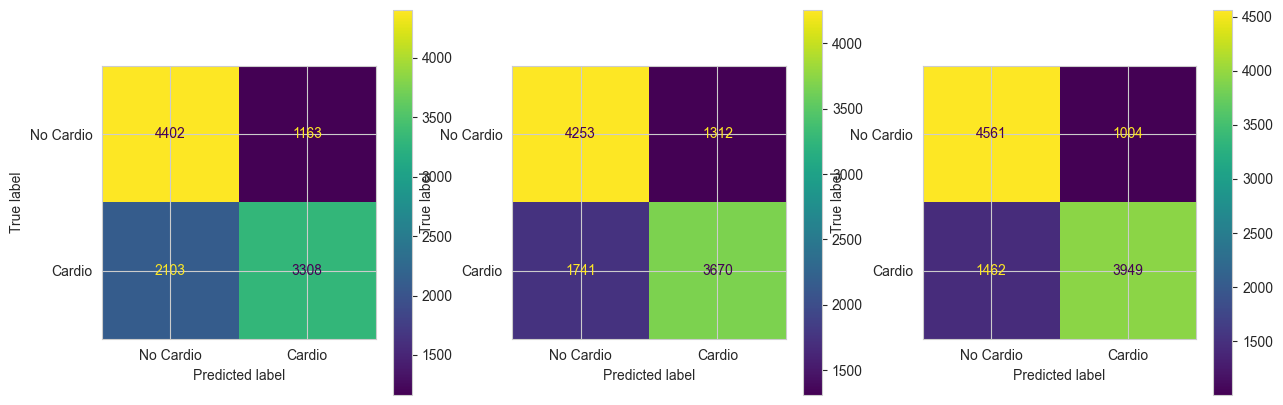

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ConfusionMatrixDisplay(cm_neural1, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[0])
ConfusionMatrixDisplay(cm_knn1, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[1])
ConfusionMatrixDisplay(cm_rforest1, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[2])

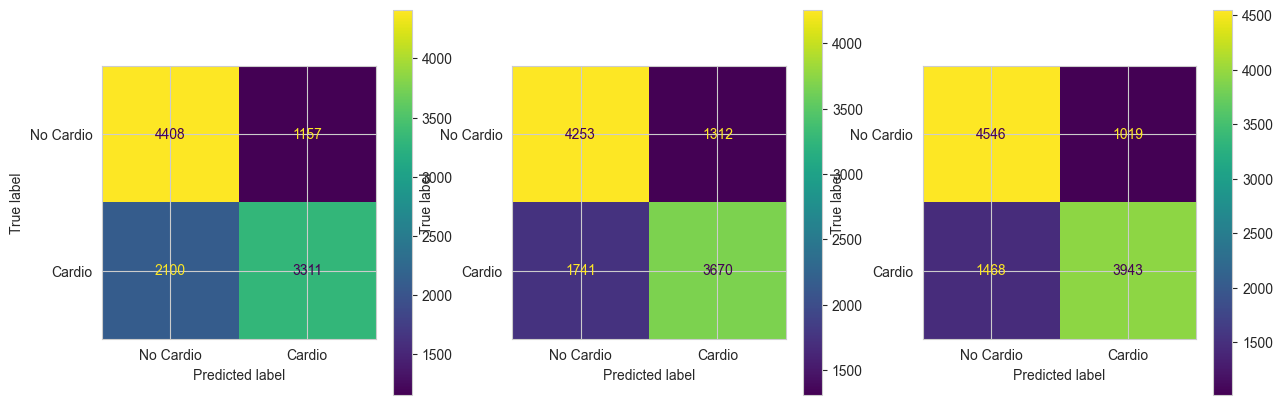

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ConfusionMatrixDisplay(cm_neural2, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[0])
ConfusionMatrixDisplay(cm_knn2, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[1])
ConfusionMatrixDisplay(cm_rforest2, display_labels=["No Cardio", "Cardio"]).plot(ax=ax[2])

In [106]:
print("Classification report for set 1")
print(classification_report(y_val1, y_pred_neural1))
print(classification_report(y_val1, y_pred_knn1))
print(classification_report(y_val1, y_pred_rforest1))

Classification report for set 1
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      5565
           1       0.74      0.61      0.67      5411

    accuracy                           0.70     10976
   macro avg       0.71      0.70      0.70     10976
weighted avg       0.71      0.70      0.70     10976

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      5565
           1       0.74      0.68      0.71      5411

    accuracy                           0.72     10976
   macro avg       0.72      0.72      0.72     10976
weighted avg       0.72      0.72      0.72     10976

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5565
           1       0.80      0.73      0.76      5411

    accuracy                           0.78     10976
   macro avg       0.78      0.77      0.77     10976
weighted avg       0.78      0.78      0.7

In [107]:
print("Classification report for set 2")
print(classification_report(y_val2, y_pred_neural2))
print(classification_report(y_val2, y_pred_knn2))
print(classification_report(y_val2, y_pred_rforest2))

Classification report for set 2
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      5565
           1       0.74      0.61      0.67      5411

    accuracy                           0.70     10976
   macro avg       0.71      0.70      0.70     10976
weighted avg       0.71      0.70      0.70     10976

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      5565
           1       0.74      0.68      0.71      5411

    accuracy                           0.72     10976
   macro avg       0.72      0.72      0.72     10976
weighted avg       0.72      0.72      0.72     10976

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5565
           1       0.79      0.73      0.76      5411

    accuracy                           0.77     10976
   macro avg       0.78      0.77      0.77     10976
weighted avg       0.77      0.77      0.7

### Confusion matrix and report for the voting classifier

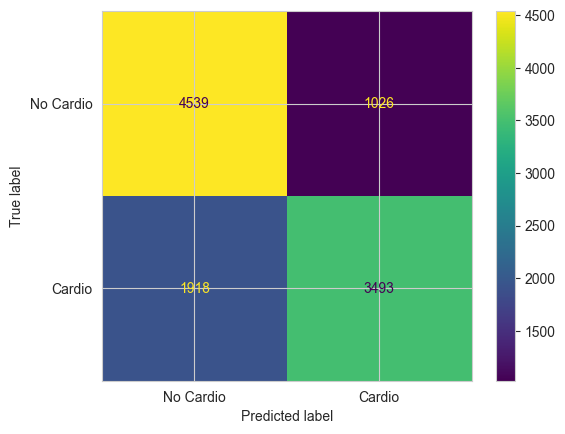

In [108]:
voting_clf2.fit(X_val2, y_val2)
y_pred_voting2 = voting_clf2.predict(X_val2)
cm_voting2 = confusion_matrix(y_val2, y_pred_voting2)
ConfusionMatrixDisplay(cm_voting2, display_labels=["No Cardio", "Cardio"]).plot()

### Classification report voting classifier

In [109]:
print("Classification report for the voting classifier")
print(classification_report(y_val2, y_pred_voting2))


Classification report for the voting classifier
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      5565
           1       0.77      0.65      0.70      5411

    accuracy                           0.73     10976
   macro avg       0.74      0.73      0.73     10976
weighted avg       0.74      0.73      0.73     10976



In [110]:
test_samples = cardio_copy2.sample(n=100, random_state=42) # choosing 100 random samples from the dataset
train_data = cardio_copy2.drop(test_samples.index) # drop the test samples from the original dataframe
test_samples.to_csv("test_samples.csv", index=False) # exporting the test data to a csv file to use in prediction script

### Train the random forest model on the whole dataset

In [112]:
random_forest_clf2.fit(train_data.drop("cardio", axis=1), train_data["cardio"])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=3)

### Save the model to a pkl file

In [113]:
import joblib
joblib.dump(random_forest_clf2, "cardio_model.pkl", compress=True)

['cardio_model.pkl']